In [1]:
import visa 
import numpy as np
import serial
import time
import os
import math
import h5py
from utils import *
from pathlib import Path
path = os.getcwd()
path = Path(path)
print(Path(str(path.parent) + '\\Classes\\') )

import sys
sys.path.append(str(path.parent) + '\\Classes\\')
from SMA100B import *
from vna import *
from SIM928 import *

%load_ext autoreload
%autoreload 2

C:\Users\oper\Desktop\labparamp\Env\paramp\lib\site-packages\visa.py:13: FutureWarning: The visa module provided by PyVISA is being deprecated. You can replace `import visa` by `import pyvisa as visa` to achieve the same effect.

The reason for the deprecation is the possible conflict with the visa package provided by the https://github.com/visa-sdk/visa-python which can result in hard to debug situations.
  warnings.warn(


C:\Users\oper\Desktop\labparamp\QTLab2122\TWPA\Classes
C:\Users\oper\Desktop\labparamp\QTLab2122\TWPA\Classes


In [2]:
field_fox = vna('192.168.3.3')
field_fox.query('*IDN?')

'Keysight Technologies,N9916A,MY53104702,A.08.01\n'

In [3]:
pump = SMA100B('192.168.3.2')
pump.query('*IDN?')

'Rohde&Schwarz,SMA100B,1419.8888K02/105168,4.70.205.75  \n'

In [145]:
#pump frequency
f0 = 17.5e9 #16.5
f1 = 18.5e9 #17.5
df = 1e6
N_f = math.floor((f1-f0)/df)
print(N_f)

f, d = field_fox.SA_print_data()
n_points = f.size
print(n_points)

maxima = np.empty(N_f)

#formula magica per calcolare tempi acquisizione con triplo ciclo in voltaggio, potenza e frequenza della pompa
#print(str(((((5.542317152023315*N_f)+0.002000093460083008)*N_p)+5.001286268234253)*N_v/(3600*24)) + ' giorni')

1000
1001


846.6954281330109


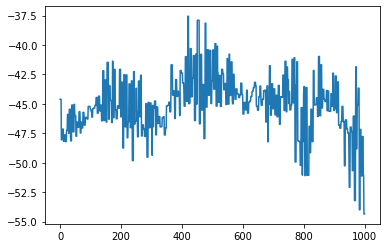

In [146]:
i = 0
start_time = time.time()
for i in range(0, N_f):
    pump.set_freq(f0+i*df)
    f, d = field_fox.SA_print_data()
    maxima[i] = max(d)
stop_time = time.time() - start_time
print(stop_time)
storage_hdf5('gain_at5GHz_vs_pump _frequency3.hdf5', maxima, 'maxima')
plt.plot(maxima)

17.919


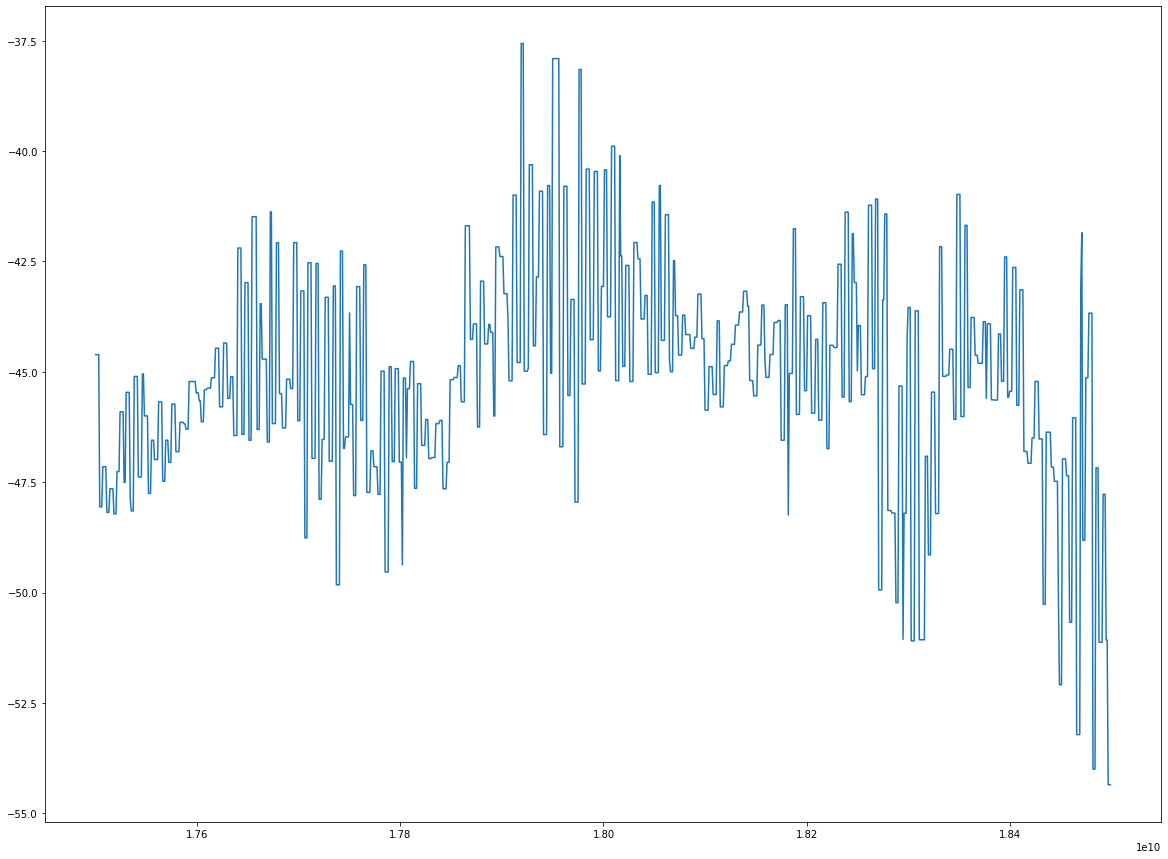

In [147]:
plt.figure(figsize=(20,15))
F = np.arange(f0, f1, df)
storage_hdf5('gain_at5GHz_vs_pump _frequency3.hdf5', F, 'pump_freq')
plt.plot(F, maxima)
print(F[np.argmax(maxima)]/1e9)

In [21]:
#bias 0.383 V soglia

[autoreload of utils failed: Traceback (most recent call last):
  File "C:\Users\oper\Desktop\labparamp\Env\paramp\lib\site-packages\IPython\extensions\autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\oper\Desktop\labparamp\Env\paramp\lib\site-packages\IPython\extensions\autoreload.py", line 455, in superreload
    module = reload(module)
  File "C:\Users\oper\AppData\Local\Programs\Python\Python38\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "C:\Users\oper\Desktop\labparamp\QTLab2122\TWPA\notebooks\utils.py", line 28
    if
      ^
SyntaxEr